# Інші алгоритми навчання без учителя

## Рекомендаційні системи. Різниця між SVD та SVD++


У бібліотеці Surprise (яка використовується для рекомендаційних систем), SVD та SVD++ є двома різними алгоритмами для прогнозування рейтингів. Ось їх основні відмінності:

- SVD (Singular Value Decomposition):

Це базова модель, яка використовує метод зменшення розмірності матриці рейтингів.
Модель використовує тільки інформацію про рейтинги користувачів для прогнозування нових рейтингів.

$$\hat{r}_{ui} = \mu + b_u + b_i + q_i^T \cdot p_u $$


- SVD++ (SVD with Implicit Feedback):

Це розширення моделі SVD, яке також враховує неявний фідбек (implicit feedback), такий як інформація про те, як користувачі взаємодіють з об'єктами (наприклад, час, який вони проводять переглядаючи сторінку, кількість кліків тощо). SVD++ включає інформацію про користувачів та об'єкти в процес прогнозування рейтингів, що може покращити точність рекомендацій.

$$\hat{r}_{ui} = \mu + b_u + b_i + q_i^T \cdot \left( p_u + \frac{1}{\sqrt{|N(u)|}} \cdot \sum_{j \in N(u)} y_j \right) $$

$|N(u)|$ - кількість об'єктів, з якими взаємодіяв користувач $u$;

$y_j$ - додатковий вектор для об'єкта j, що представляє неявний фідбек користувачів з об'єктом j.(вектор факторів для товару j).

https://surprise.readthedocs.io/en/stable/matrix_factorization.html

In [24]:
pip install scikit-surprise

In [25]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD, SVDpp
from surprise import accuracy

data = Dataset.load_builtin('ml-100k')
reader = Reader(rating_scale=(1, 5))
trainset, testset = train_test_split(data, test_size=0.2)


In [26]:
svd_model = SVD(n_factors=100,
                n_epochs=20,
                lr_all=0.005,
                reg_all=0.02)
svd_model.fit(trainset)
predictions_svd = svd_model.test(testset)
accuracy_svd = accuracy.rmse(predictions_svd)
accuracy_svd

RMSE: 0.9357


0.9356528225897731

In [27]:
svdpp_model = SVDpp(n_factors=100,
                n_epochs=20,
                lr_all=0.005,
                reg_all=0.02)
svdpp_model.fit(trainset)
predictions_svdpp = svdpp_model.test(testset)
accuracy_svdpp = accuracy.rmse(predictions_svdpp)
accuracy_svdpp

RMSE: 0.9266


0.9266162776907434

## Методи зменшення розмірності

### KernelPCA

**Kernel PCA (Principal Component Analysis)** є одним із способів використання ядерної трансформації для розширення методу головних компонентів (PCA) на нелінійні дані.

PCA працює лише з **лінійно залежними даними**. Якщо дані мають складну нелінійну структуру, PCA може дати непридатні результати. Тут на допомогу приходить ядерна PCA. Ядерна PCA використовує функцію ядра для перетворення даних в простір вищої розмірності, де вони можуть бути лінійно розділені.

Основна ідея полягає в тому, щоб спочатку виконати ядерне перетворення даних в вищорозмірний простір, а потім застосувати стандартний PCA до отриманих даних. Це дозволяє знайти головні компоненти в просторі вищої розмірності, який може виявити нелінійні залежності між ознаками.

Однак, використання ядерної PCA має свої **недоліки**:
- вибір підходящої функції ядра та параметрів цієї функції. Невірний вибір може призвести до перенавчання або недонавчання моделі.

- обчислювальні витрати для ядерної PCA можуть бути значно вищими, особливо для великих наборів даних та складних ядерних функцій.

Головна математична різниця між стандартним PCA і ядерним PCA полягає в тому, як вони обчислюють головні компоненти.

Формула для обчислення головних компонентів у стандартному PCA виглядає наступним чином:

$$PCA(X) = X\cdot V$$

$X$ - матриця даних,

$V$ - матриця головних векторів

У ядерному PCA, для обчислення головних компонентів
1. Cпочатку знаходять ядерну матрицю $K$, яка обчислюється за допомогою ядерної функції для вихідних даних.
 $$K_{ij} = k(x_i, x_j)$$

3. Потім обчислюється матриця Грама $H$, яка представляє собою результат зводження ядерної матриці до центрованого простору (це забезпечує центрування в новому просторі, аналогічне центруванню даних у стандартному PCA).

$$H=K-1/n⋅K⋅1−1/n⋅1⋅K+1/n^2⋅1⋅K⋅1 $$

3. Нарешті, знаходять головні компоненти шляхом розкладання матриці Грама на власні вектори.

$$KPCA(X)=H(X)K(X)=V$$


https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

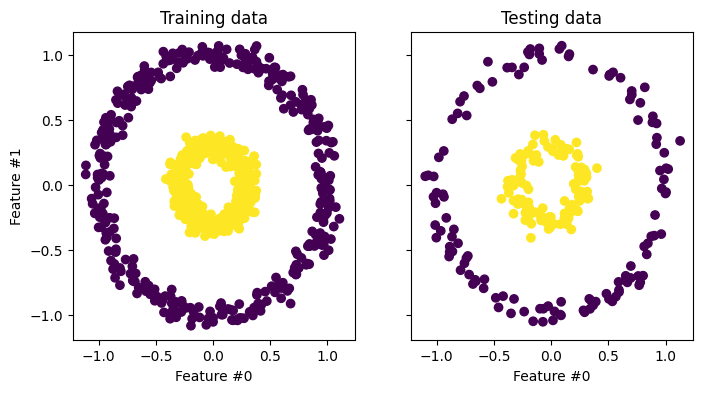

In [28]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [29]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

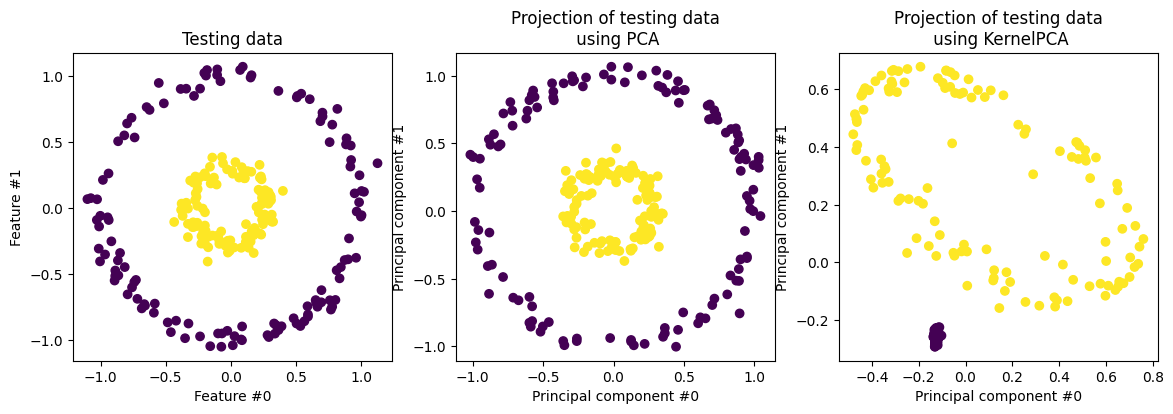

In [30]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

### FactorAnalysis

**Factor Analysis (факторний аналіз)** - це статистичний метод, який використовується для аналізу залежностей між спостережуваними змінними, що зазвичай називаються «спостережуваними» або «маніпульованими» змінними, і їх відповідними «факторами». Фактори є невидимими (латентними) змінними, які призводять до кореляцій між спостережуваними змінними.
Математично, факторний аналіз зазвичай формулюється наступним чином:

1.Модель спостережуваних змінних:
Нехай у нас є n спостережуваних змінних X_1, X_2, X_3..., які спостерігаються для N об'єктів. Ми можемо представити ці спостереження у векторній формі для кожного об'єкту:

$$X_i = [x_{i1}, x_{i2}, ..., x_{in}]^T$$

2.Модель факторів:
Нехай m - це кількість факторів. Модель факторів включає матрицю факторів F розмірності N×m, яка представляється у векторній формі

$$F = [f_{1}, f_{2}, ..., f_{m}]$$

3.Математична формула для Factor Analysis:
Ми припускаємо, що кожна спостережувана змінна $X_i$ може бути представлена як лінійна комбінація факторів $F$ з доданком помилки $ε$:

$$X_i = μ + LF_i + ε_i$$

де:

$X_i$- матриця спостережуваних змінних розмірності N×n,

$μ$ - вектор середніх значень розмірності 1×n,

$L$ - матриця факторних навантажень розмірності n×m,

$F_i$ - матриця факторів розмірності N×m,

$ε_i$ - матриця помилок  розмірності N×m,

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis



In [31]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

data = load_iris(as_frame = True)
X = data.data
display(X)
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

print("Ваги факторів (факторні навантаження):")
print(fa.components_)
print("\nФактори (перетворені дані):")
display(pd.DataFrame(X_fa))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Ваги факторів (факторні навантаження):
[[ 0.72746132 -0.18085204  1.75790224  0.73100458]
 [-0.36874572 -0.24059     0.03551754  0.04526567]]

Фактори (перетворені дані):


,0,1
0,-1.327617,-0.561311
1,-1.337639,-0.002798
2,-1.402815,0.306349
3,-1.301043,0.718827
4,-1.333424,-0.364589
...,...,...
145,0.844681,-0.540558
146,0.707514,0.247219
147,0.826875,-0.132014
148,0.922997,0.635225


### TruncatedSVD

**TruncatedSVD (Знижене сингулярне розкладання)** - це метод зменшення розмірності, який використовує сингулярне розкладання матриці для отримання наближеного представлення вихідних даних з меншою кількістю ознак. Цей метод часто використовується для роботи з розрідженими даними та зменшення обсягу обчислень.

$$X = U · Σ · V^T $$

де:

$X$ - вихідна матриця даних розмірності m×n,

$U$ - ліві сингулярні вектори розмірності m×k,

$Σ$ - діагональна матриця сингулярних значень розмірності k×k,

$V^T$- транспонована матриця правих сингулярних векторів розмірності k×n,

$k$ - кількість компонент, яку ми хочемо залишити


Чи можно використовувати TruncatedSVD  scikit learn замість метода SVD в surprise?

Так, в бібліотеці Surprise, яка призначена для рекомендаційних систем і працює з розрідженими матрицями рейтингів, використовують TruncatedSVD з scikit-learn для зниження розмірності.

!!!Однак, важливо враховувати!!!,

що TruncatedSVD в scikit-learn розрахований на плотні матриці, тоді як більшість рекомендаційних систем працюють з розрідженими даними.

![alt text](https://www.researchgate.net/publication/3457515/figure/fig3/AS:349300056969219@1460291031279/Diagram-of-SVD-and-truncated-SVD-for-feature-transformation.png)

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_embedding.html#sphx-glr-auto-examples-ensemble-plot-random-forest-embedding-py

In [32]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris

data = load_iris(as_frame = True)
X = data.data
display(X)

# Ініціалізація та навчання моделі TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Виведення результатів
print("Знижена розмірність даних за допомогою TruncatedSVD:")
display(pd.DataFrame(X_svd))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Знижена розмірність даних за допомогою TruncatedSVD:


,0,1
0,5.912747,2.302033
1,5.572482,1.971826
2,5.446977,2.095206
3,5.436459,1.870382
4,5.875645,2.328290
...,...,...
145,9.226517,-0.931293
146,8.566265,-1.039134
147,9.025923,-0.885027
148,9.105599,-0.996416


### TSNE


**t-distributed Stochastic Neighbor Embedding (t-SNE)** - це метод зниження розмірності, який використовується для візуалізації даних в просторі меншої розмірності, зазвичай двовимірному або тривимірному. Він намагається зберегти локальні структури даних, тобто близькі точки вихідного простору зберігають свої відносини у просторі нижчої розмірності, але не гарантує збереження глобальних відстаней.

1. Співпадання (Affinity Computation):
Спочатку вираховується ймовірність подібності між кожною парою точок в вихідному просторі. Це може бути зроблено за допомогою ядрової функції Гауса або t-розподілу Стьюдента.
Для кожної точки $x_i$  обчислюється умовна ймовірність $P_{j∣i}$, що визначає ймовірність того, що точка $x_j$ буде сусідом точки $x_i$ в просторі вихідних даних.

2. Відображення (Mapping):

- Потім алгоритм намагається знайти нове представлення для точок в просторі меншої розмірності Y.
- Він робить це шляхом оптимізації функції втрати, такої як KL-дивергенція, між умовними ймовірностями в просторі вихідних даних $P_{j∣i}$ та у просторі $Y$ $Q_{j∣i}$.
- Основна ідея полягає в тому, щоб точки, які мають велику взаємну відстань в просторі вихідних даних, також мали велику взаємну відстань у просторі $Y$, і навпаки.

$$Y = f(Y, σ) + ε$$

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

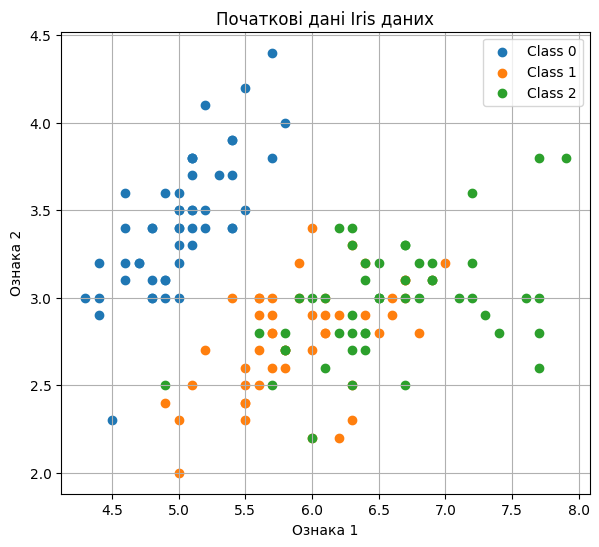

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

iris = load_iris()
X = iris.data
y = iris.target

plt.figure(figsize=(15, 6))
# Початкові дані
plt.subplot(1, 2, 1)
for i in range(len(np.unique(y))):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')
plt.title('Початкові дані Iris даних')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend()
plt.grid(True)

In [34]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

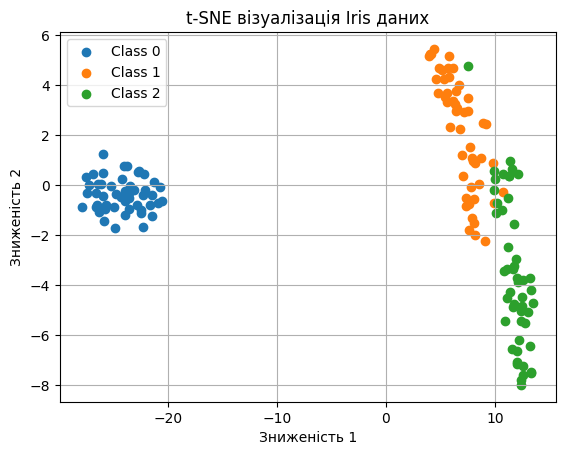

In [35]:
# Візуалізація результатів
for i in range(len(np.unique(y))):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=f'Class {i}')
plt.title('t-SNE візуалізація Iris даних')
plt.xlabel('Зниженість 1')
plt.ylabel('Зниженість 2')
plt.legend()
plt.grid(True)
plt.show()

## Кластерні моделі

### Метрики якості кластерних моделей

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.cluster







**Homogeneity (однорідність)** - це метрика, яка використовується для оцінки якості кластеризації даних. Вона вимірює, наскільки кожен кластер складається з точок, які належать тільки одному класу вихідних даних. Однорідність означає, що кластери мають однакові класи.

Ця метрика надає інформацію про те, наскільки точки з однаковими значеннями атрибутів схильні до знаходження в одному і тому ж кластері.

У випадку, коли всі кластери містять тільки елементи одного класу, метрика однорідності буде дорівнювати 1. Чим ближче значення однорідності до 1, тим краще кластеризація.

$$ h = 1 - \frac{H(C|K)}{H(C)} $$

$h$ - оцінка однорідності,

$H(C|K)$ - умовна ентропія кластерів при умові, що вони розбиті на кластери,

$H(C)$ - ентропія кластерів.

In [38]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

**Completeness (завершеність)** - це метрика для оцінки якості кластеризації даних, яка вимірює, наскільки всі елементи одного класу вихідних даних належать до одного кластера. Завершеність вказує на те, наскільки кожен кластер відповідає одному класу вихідних даних.

Формально, завершеність можна обчислити як умовну ентропію кластерів при умові, що вони розбиті на кластери:

$$c = 1 - \frac{H(K|C)}{H(K)}$$

$H(K|C)$ - умовна ентропія кластерів при умові, що вони розбиті на кластери,

$H(K)$ - ентропія кластерів.

In [40]:
from sklearn.metrics.cluster import completeness_score
completeness_score([0, 0, 1, 1], [1, 1, 1, 1])

1.0


**V-мера (V-measure)** - це одна з метрик оцінки якості кластеризації, яка враховує як однорідність (homogeneity) і завершеність (completeness). Вона є гармонічним середнім між цими двома метриками і дозволяє оцінити збалансованість кластеризації.

Формула для обчислення V-мери виглядає наступним чином:
$$v = 2 \cdot \frac{h \cdot c}{h + c}$$



In [43]:
from sklearn.metrics.cluster import v_measure_score
print(v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))
print(v_measure_score([0, 0, 1, 1], [1, 1, 0, 1]))

1.0
0.34371101848545077



**Поправлена взаємна інформація (Adjusted Mutual Information - AMI)** використовується для вимірювання схожості між двома кластерними розбиттями даних, ураховуючи випадковість. Формула для поправленої взаємної інформації між двома кластерними розбиттями U та V може бути виражена наступним чином:

$$ AMI(U, V) = \frac{I(U, V) - E[I(U, V)]}{\max(H(U), H(V)) - E[I(U, V)]} $$

$I(U, V)$ - взаємна інформація між кластерними розбиттями U та V,

$E[I(U, V)]$ - очікуване значення взаємної інформації між випадковими розбиттями даних,

$H(U)$ та $H(V)$ - ентропія кластерного розбиття U та V відповідно.

In [47]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

**Скоригований індекс Ренда (Adjusted Rand Index - ARI)** - це метрика для вимірювання схожості між двома кластерними розбиттями даних. ARI розраховує, наскільки пари точок знаходяться в одному або різних кластерах у вихідних та передбачених кластерних розбиттях. Значення ARI знаходиться в діапазоні від -1 до 1, де 1 вказує на ідеальну узгодженість між кластерними розбиттями, 0 вказує на випадкову узгодженість, а значення нижче 0 вказує на випадковий розподіл кластерів.

Формула для обчислення скоригованого індексу Ренда (ARI) виглядає наступним чином:

$$ARI = \frac{{\sum_{ij} \binom{n_{ij}}{2} - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}}{{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}] - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}}$$

$\sum_{ij}$ - сумування по всіх можливих пар кластерів,

$\binom{n_{ij}}{2}$ - кількість спостережень, які належать однаковим кластерам у вихідних та передбачених кластерних розбиттях,

$\binom{a_i}{2}$ та $\binom{b_j}{2}$ - кількість спостережень у кожному кластері i та j,

$\binom{n}{2}$ - загальна кількість можливих пар спостережень

In [48]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1]))
print(adjusted_rand_score([0, 0, 1, 1], [1, 1, 0, 0]))
print(adjusted_rand_score([0, 0, 1, 2], [0, 0, 1, 1]))
print(adjusted_rand_score([0, 0, 0, 0], [0, 1, 2, 3]))

1.0
1.0
0.5714285714285714
0.0


**Cилует (Silhouette)** - це метрика для оцінки якості кластеризації даних, яка вимірює, наскільки добре кожен об'єкт в кластері подібний до інших об'єктів у своєму кластері, порівняно з об'єктами інших кластерів. Вона показує, наскільки далеко розташовані об'єкти від інших об'єктів у своєму кластері порівняно з об'єктами інших кластерів.

Формула для обчислення силуету для одного об'єкта i виглядає наступним чином:

$$s_i = \frac{b_i - a_i}{\max(a_i, b_i)}$$

$s_i$ - силует для об'єкта i,

$a_i$(внутрішньокластерна відстань)​ та $b_i$(середня відстань до найближчого кластера) - середня відстань від об'єкта i до об'єктів у тому ж кластері та до об'єктів у будь-якому іншому кластері відповідно.

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 'auto')
silhouette_score(X, kmeans.fit_predict(X))

0.7020937832636733

### Інші кластерні алгоритми

https://scikit-learn.org/stable/modules/clustering.html#

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** - це алгоритм кластеризації, який використовує щільність даних для визначення кластерів у просторі. Основна ідея полягає в тому, щоб визначити кластери як групи точок, які мають високу щільність і розділені областями низької щільності.

Формула для алгоритму DBSCAN не існує, оскільки він базується на концепції визначення груп точок на основі їхньої щільності в просторі.

Проте, основні параметри DBSCAN, які визначають кластери, включають:

- **eps (epsilon)** - радіус, що визначає найбільшу відстань між двома точками, які все ще розглядаються як в одному кластері.
- **min_samples** - мінімальна кількість точок, які потрібно мати в околі точки, щоб вона була визначена як ядро кластера.


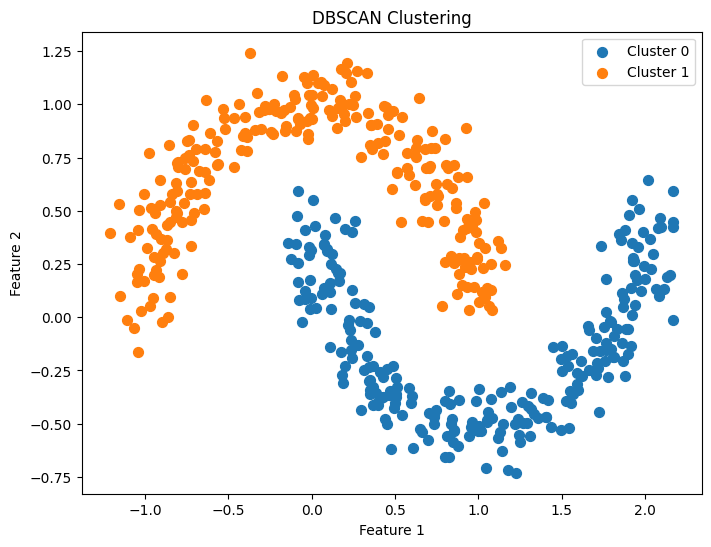

In [56]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Генеруємо випадкові дані у формі двох місяців
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

unique_labels = np.unique(y_dbscan)

plt.figure(figsize=(8, 6))
for label in unique_labels:
    cluster_points = X[y_dbscan == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**AgglomerativeClustering** - це метод ієрархічної кластеризації, який починає з того, що кожна точка розглядається як окремий кластер, а потім об'єднується пара кластерів на кожному кроці відповідно до певного критерію злиття, такого як мінімізація відстані між кластерами. Цей процес продовжується до тих пір, поки всі точки не будуть об'єднані в один кластер або досягнута певна кількість кластерів.

У агломеративній кластеризації немає конкретної формули, яка б визначала процес об'єднання кластерів. Проте існує кілька критеріїв злиття, таких як "single", "complete", "average" і "ward", кожен з яких має свій спосіб визначення відстані між кластерами, що використовується для прийняття рішення про те, які кластери об'єднати.

- ward: мінімізує зміну дисперсії між кластерами.
- average: об'єднує кластери на основі середньої відстані між точками.
- complete: об'єднує кластери на основі максимальної відстані між точками.
- single: об'єднує кластери на основі мінімальної відстані між точками.

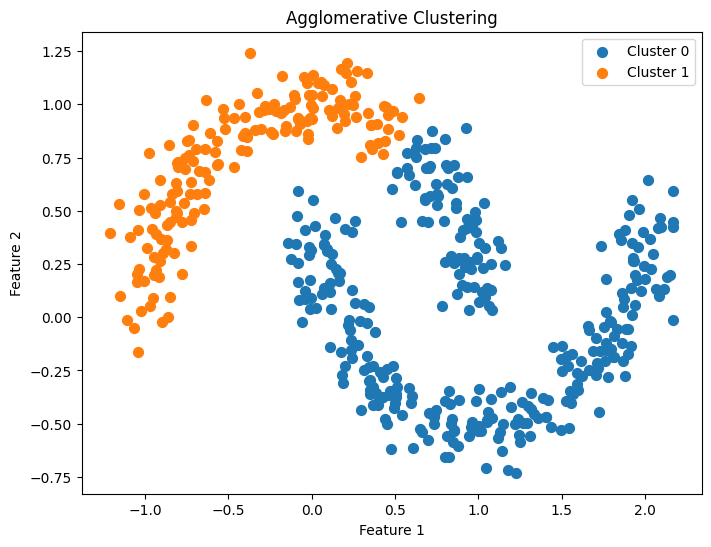

In [57]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Генеруємо випадкові дані у формі двох місяців
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

agglomerative = AgglomerativeClustering(n_clusters=2)
y_agglomerative = agglomerative.fit_predict(X)
unique_labels = np.unique(y_agglomerative)


plt.figure(figsize=(8, 6))
for label in unique_labels:
    cluster_points = X[y_agglomerative == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=50)

plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Affinity Propagation (Розповсюдження спорідненості)** - це алгоритм кластеризації, який визначає кластери, використовуючи "повідомлення" між парами точок для вибору "елементів" (exemplars), які найкраще представляють кожен кластер. Кожен елемент, вибраний як екземпляр, служить центром кластера, а інші елементи призначаються до кластера, який має найбільше "повідомлень" про них від екземпляра.

Формула для визначення "повідомлень" між парами точок в Affinity Propagation виглядає наступним чином:

$$S(i, k) = -||x_i - x_k||^2$$

У цьому випадку схожість визначається як відстань між точками, виражена у вигляді квадрата Евклідової відстані між ними.

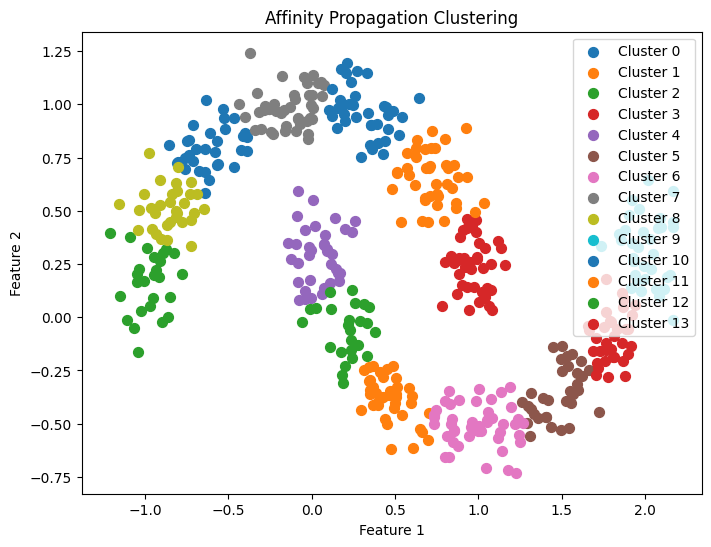

In [58]:
from sklearn.datasets import make_moons
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

affinity_propagation = AffinityPropagation(random_state=42)
y_affinity_propagation = affinity_propagation.fit_predict(X)
unique_labels = np.unique(y_affinity_propagation)

plt.figure(figsize=(8, 6))
for label in unique_labels:
    cluster_points = X[y_affinity_propagation == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=50)

plt.title('Affinity Propagation Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**SpectralClusteringSpectral Clustering** - це метод кластеризації, який використовує власні вектори матриці суміжності графа для розбиття набору даних на кластери. Основна ідея полягає в тому, щоб використовувати власні вектори, які відповідають найменшим власним значенням матриці Лапласа графа, для виявлення структури в даних та виділення кластерів.

Формула для обчислення власних векторів матриці Лапласа графа може бути записана так:

$$L = D - W$$

$L$ - матриця Лапласа графа,

$D$ та $W$ - діагональна матриця ступенів та матриця суміжності графа відповідно.


Діагональна матриця ступенів (Degree Matrix)  - це квадратна матриця $D$ та $D_{ij}$ дорівнює сумі ступенів всіх ребер, що приєднуються до вершини i. Для неорієнтованого графа ступінь вершини - це кількість ребер, що приєднуються до неї.
$$D_{ii} = \sum_{j=1}^{n} A_{ij}$$

Матриця суміжності графа (Adjacency Matrix) це квадратна матриця $A$ та $A_{ij}$ дорівнює

1, якщо між вершинами і та j існує зв'язок (ребро),

і 0 в протилежному випадку.

$$A_{ij} = \begin{cases} 1, & \text{якщо є зв'язок між вершинами } i \text{ та } j \\ 0, & \text{інакше} \end{cases}$$

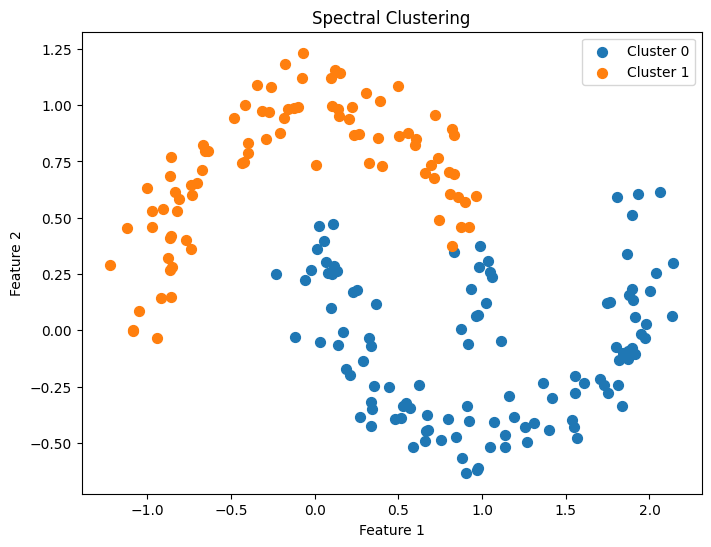

In [59]:
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np

# Генеруємо випадкові дані у формі двох місяців
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
y_spectral_clustering = spectral_clustering.fit_predict(X)
unique_labels = np.unique(y_spectral_clustering)

plt.figure(figsize=(8, 6))
for label in unique_labels:
    cluster_points = X[y_spectral_clustering == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=50)

plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()